In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train_orginal= train.copy()
test_orginal= test.copy()

In [4]:
print(train.shape, test.shape)

(8523, 12) (5681, 11)


In [5]:
print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [6]:
print(test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [7]:
print(train.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [9]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
#combining train and test 

In [11]:
train['source']= 'train'
test['Item_Outlet_Sales']= 0

In [12]:
data=pd.concat([train,test], sort=False)

In [13]:
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [14]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

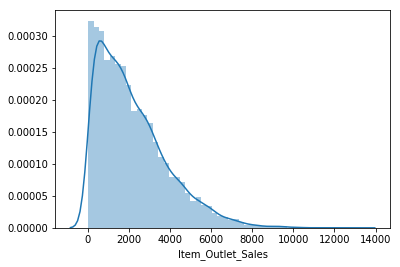

In [15]:
sns.distplot(train['Item_Outlet_Sales'])

In [16]:
print('skewness %f' %data['Item_Outlet_Sales'].skew())

skewness 1.544684


In [17]:
print('Kurtosis %f' %data['Item_Outlet_Sales'].kurt())

Kurtosis 2.419439


In [ ]:
#Univariate analysis
#Numerical data

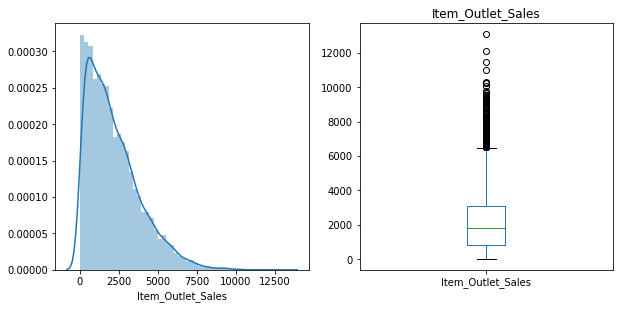

In [18]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train['Item_Outlet_Sales'])
plt.subplot(222)
train['Item_Outlet_Sales'].plot.box(figsize=(10,10), title="Item_Outlet_Sales")
plt.show()

#Lot of outliers and rightly skewed

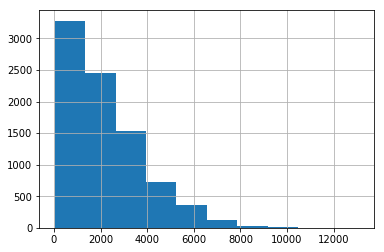

In [19]:
train['Item_Outlet_Sales'].hist();

In [20]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [21]:
df= train.fillna(train['Item_Weight'].mean())
df['Item_Weight']

0        9.300000
1        5.920000
2       17.500000
3       19.200000
4        8.930000
5       10.395000
6       13.650000
7       12.857645
8       16.200000
9       19.200000
10      11.800000
11      18.500000
12      15.100000
13      17.600000
14      16.350000
15       9.000000
16      11.800000
17       9.000000
18      12.857645
19      13.350000
20      18.850000
21      12.857645
22      14.600000
23      12.857645
24      13.850000
25      13.000000
26       7.645000
27      11.650000
28       5.925000
29      12.857645
          ...    
8493     7.420000
8494    15.200000
8495     9.695000
8496     7.420000
8497    13.650000
8498    15.350000
8499    11.600000
8500    20.350000
8501     5.340000
8502     8.420000
8503    20.500000
8504    12.857645
8505    10.500000
8506    17.250000
8507     5.880000
8508    11.350000
8509     8.100000
8510    13.800000
8511    17.500000
8512    20.700000
8513    12.000000
8514    15.000000
8515    20.700000
8516    18.600000
8517    20

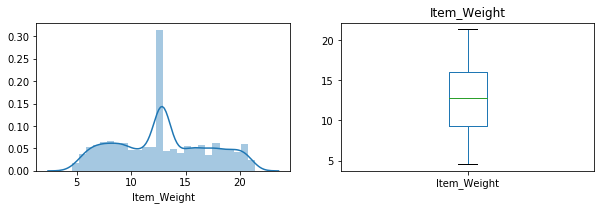

In [22]:
plt.figure(1)
plt.subplot(221)
sns.distplot(df['Item_Weight'])
plt.subplot(222)
df['Item_Weight'].plot.box(figsize=(10,6), title='Item_Weight')

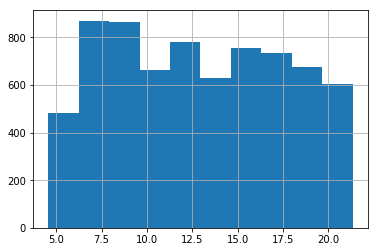

In [23]:
train['Item_Weight'].hist()

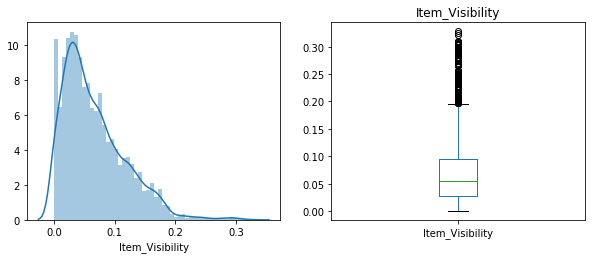

In [24]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train['Item_Visibility'])
plt.subplot(222)
train['Item_Visibility'].plot.box(figsize=(10,8), title='Item_Visibility')

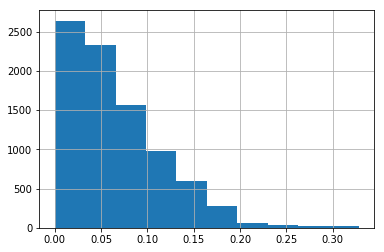

In [25]:
train['Item_Visibility'].hist()

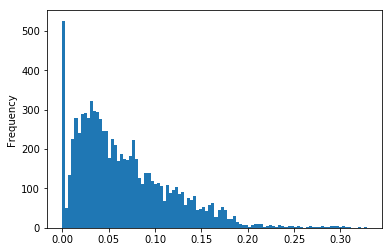

In [27]:
train['Item_Visibility'].plot(kind='hist', bins=100)


#iteam visiblity should not be zero, this is wrong, we will change this later and replace wiht its mean value

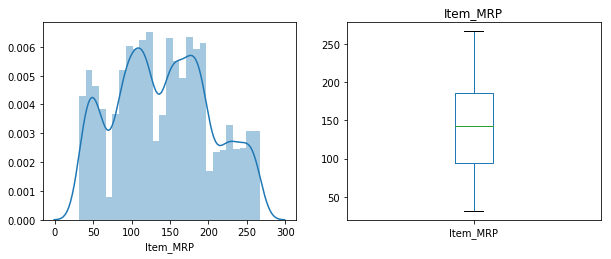

In [28]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train['Item_MRP'])
plt.subplot(222)
train['Item_MRP'].plot.box(figsize=(10,8), title='Item_MRP')

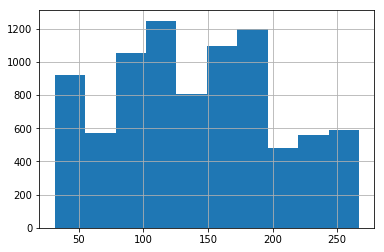

In [29]:
train['Item_MRP'].hist()

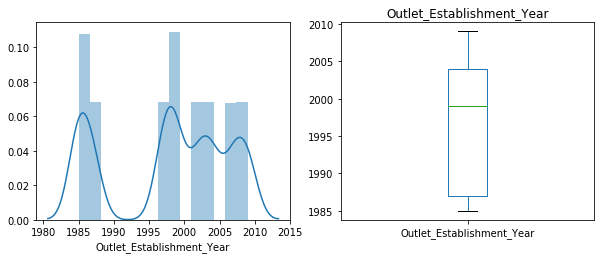

In [30]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train['Outlet_Establishment_Year'])
plt.subplot(222)
train['Outlet_Establishment_Year'].plot.box(figsize=(10,8), title='Outlet_Establishment_Year')

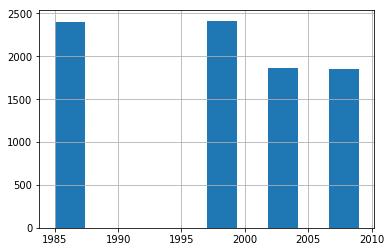

In [31]:
train['Outlet_Establishment_Year'].hist()

In [ ]:
#Categorical data

In [ ]:
#train['Item_Identifier'].value_counts(normalize=True).plot.bar(title='Item_Identifier')

#output doesnt come properly

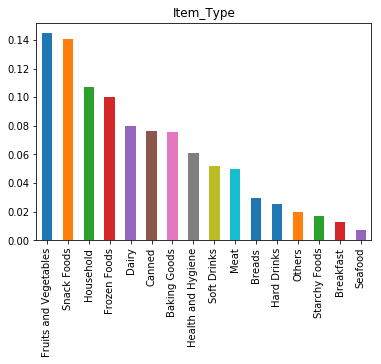

In [32]:
train['Item_Type'].value_counts(normalize=True).plot.bar(title='Item_Type')

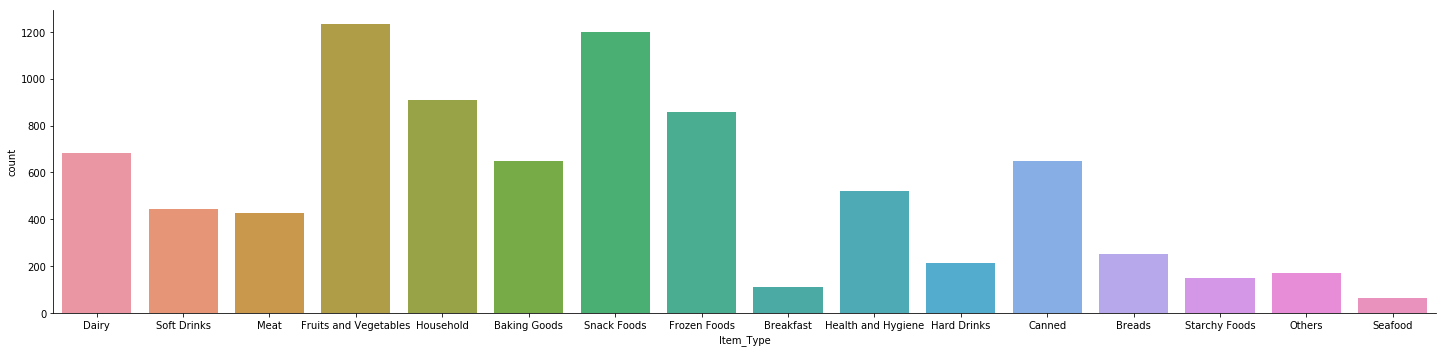

In [33]:
sns.catplot(x='Item_Type', kind='count', data=train, aspect=4)

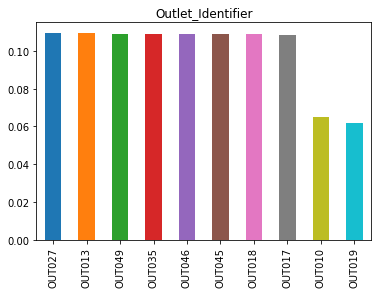

In [34]:
train['Outlet_Identifier'].value_counts(normalize=True).plot.bar(title='Outlet_Identifier')


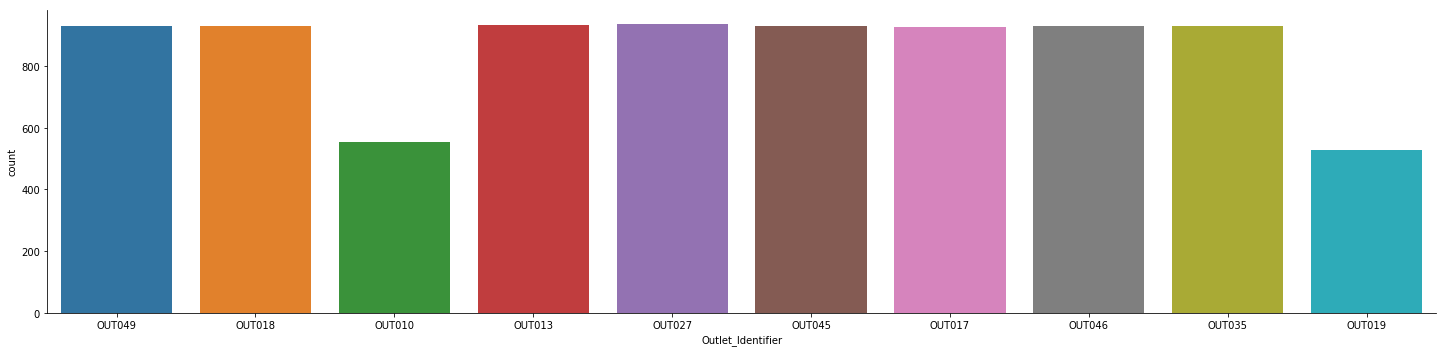

In [35]:
sns.catplot(x='Outlet_Identifier', kind='count', data=train, aspect=4)

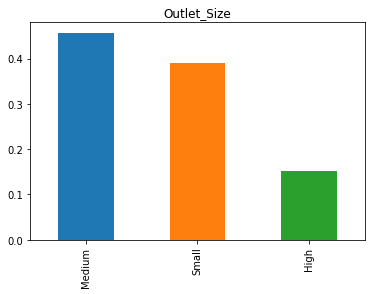

In [36]:
train['Outlet_Size'].value_counts(normalize=True).plot.bar(title='Outlet_Size')


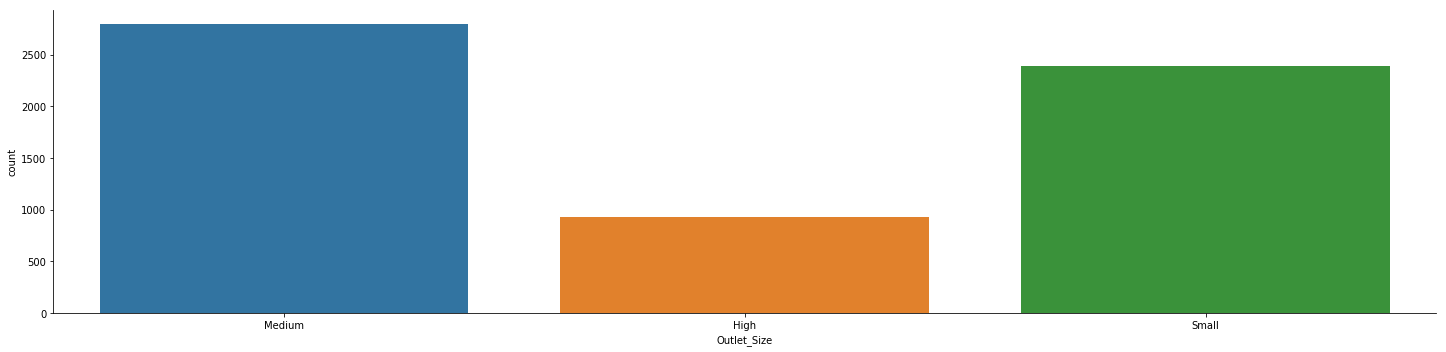

In [37]:
sns.catplot(x='Outlet_Size', kind='count', data=train, aspect=4)

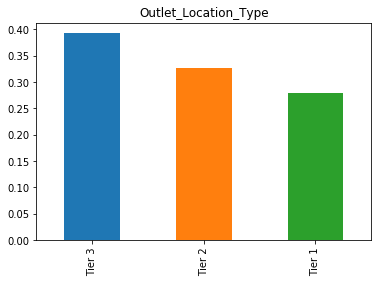

In [38]:
train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(title='Outlet_Location_Type')


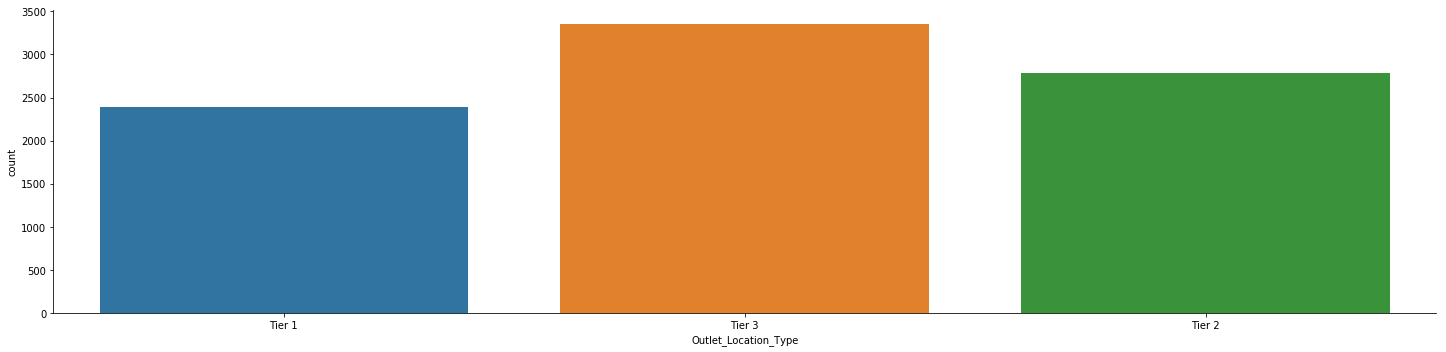

In [39]:
sns.catplot(x='Outlet_Location_Type', kind='count', data=train, aspect=4)

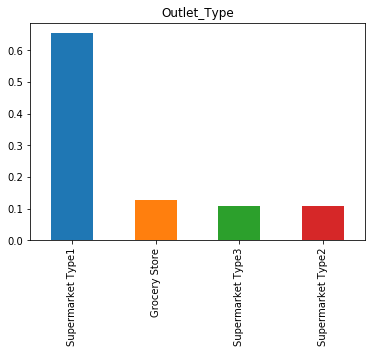

In [40]:
train['Outlet_Type'].value_counts(normalize=True).plot.bar(title='Outlet_Type')

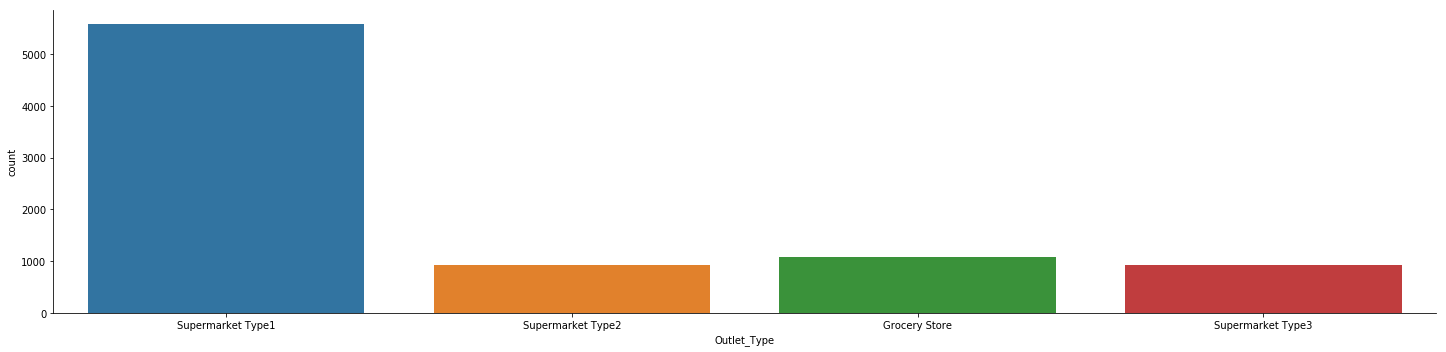

In [41]:
sns.catplot(x='Outlet_Type', kind='count', data=train, aspect=4)

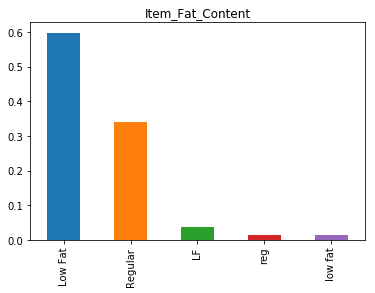

In [42]:
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(title='Item_Fat_Content')


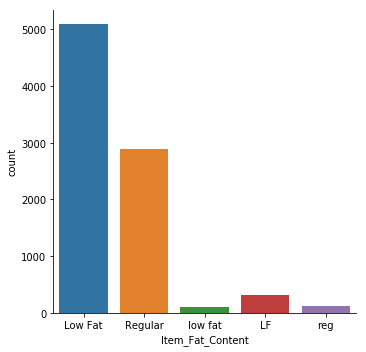

In [43]:
sns.catplot(x='Item_Fat_Content', kind='count', data=train)

In [ ]:
#Replacing LF and RF

In [44]:
train['Item_Fat_Content'].replace({'reg':'Regular', 'Low Fat':'Low fats', 'low fat':'Low fats', 'LF':'Low fats'}, inplace=True)

In [ ]:
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(title='Item_Fat_Content')

In [ ]:
sns.catplot(x='Item_Fat_Content', kind='count', data=train)

In [ ]:
#Bi-Variate analysis
#Numerical TV vs Numerical IV

In [ ]:
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=train)

In [ ]:
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train)

In [ ]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train)

In [ ]:
sns.scatterplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train)

In [ ]:
#Numerical DV vs Categorical Variables

In [ ]:
sns.catplot(x='Item_Fat_Content', y='Item_Outlet_Sales',data=train)

In [ ]:
sns.catplot(x='Item_Fat_Content', y='Item_Outlet_Sales', kind='violin',data=train)

In [ ]:
sns.catplot(x='Item_Type', y='Item_Outlet_Sales',kind='violin', data=train,aspect=4)

In [ ]:
sns.catplot(x='Item_Type', y='Item_Outlet_Sales',kind='bar', data=train,aspect=4)

In [ ]:
sns.catplot(x='Outlet_Identifier', y='Item_Outlet_Sales', kind='violin', data=train,aspect=4)

In [ ]:
sns.catplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train,aspect=4)

In [ ]:
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train)

In [ ]:
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales',kind='violin' ,data=train)

In [ ]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales', data=train)

In [ ]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales', kind='violin', data=train)

In [ ]:
sns.catplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train, aspect=4)

In [ ]:
sns.catplot(x='Outlet_Type', y='Item_Outlet_Sales', kind='violin',data=train, aspect=4)

In [ ]:
#Before proceeding with the model building, we will do feature engineering
#But, before that, we must treat Null values

In [ ]:
train.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
l_enc  = LabelEncoder()
a = l_enc.fit_transform(train['Item_Identifier'])

In [ ]:
a

In [ ]:
train['Item_Weight'].fillna(a.mean(),inplace = True)

In [ ]:
train.Item_Weight.isna().sum()

In [ ]:
train['Outlet_Size'].fillna('Medium',inplace  = True)

In [ ]:
train['Outlet_Size'].isna().sum()

In [ ]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [ ]:
a= train[train['Item_Visibility']!=0]['Item_Visibility'].mean()

In [ ]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,a)

In [ ]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [ ]:
#Feature Engineering

In [ ]:
#creating new features 

In [ ]:
#train['Item_Type'].nunique()
train['Item_Type'].unique()

In [ ]:
#creating a new feature called item_type_new()

In [ ]:
perishable=['Breads', 'Breakfast', 'Dairy', 'Fruits and Vegetables', 'Meat','Seafood']
nonperishable=['Baking Goods', 'Canned', 'Frozen Foods', 'Hard Drinks', 'Health and Hygiene','Household', 'Soft Drinks' ]
item_list=[]
for i in train['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif(i in nonperishable):
        item_list.append('nonperishable')
    else:
        item_list.append('Not sure')
        
train['Item_Type_new']= item_list

In [ ]:
train['Item_Type_new'].head(10)

In [ ]:
# with the Item_Identifier variable we can create a new feature
train['Item_Category']=  train['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*':'DR', '^FD[A-Z]*[0-9]*':'FD', '^NC[A-Z]*[0-9]*':'NC'}, regex=True)

In [ ]:
train['Item_Category'].head()

In [ ]:
Food = pd.crosstab(train['Item_Type'], train['Item_Category'])
Food

In [ ]:
#We will 
#also change the values of Item_Fat_Content wherever Item_category is ‘NC’ because non-consumable items cannot have
#any fat content

train['Item_Fat_Content'][(train['Item_Category']=='NC')]= 'Non Edible'

In [ ]:
train['Item_Fat_Content'].unique()

In [ ]:
#creating a varibale with Outlet_Establishment_Year

In [ ]:
train['Outlet_Years']= 2020-train['Outlet_Establishment_Year']
train['Outlet_Years'].head()

In [ ]:
#creating another variable which says, the price per unit weight

In [ ]:
train['price_per_unit_wt']= train['Item_MRP']/train['Item_Weight']
train['price_per_unit_wt'].head()

In [ ]:
#Earlier in the Item_MRP vs Item_Outlet_Sales plot, we saw Item_MRP was spread across in 4 chunks. 
#Now let’s assign a label to each of these chunks and use this label as a new variable.


#function def
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'

train['Item_MRP_Clusters'] = train['Item_MRP'].astype('int').apply(clusters)
train.head(10)

In [ ]:
train['Item_MRP_Clusters'].unique()

In [ ]:
#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])

In [ ]:
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_MRP_Clusters'] = le.fit_transform(train['Item_MRP_Clusters'])

In [ ]:
train.info()

In [ ]:
a = pd.get_dummies(train[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category']])
train = train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Item_Category', 'source'],axis = 1 )
train = pd.concat([train,a],axis = 1)

In [ ]:
#Removing skewness
train['price_per_unit_wt'] = np.log(train['price_per_unit_wt'])
train['Item_Visibility'] = np.log(train['Item_Visibility'])

In [ ]:
train['price_per_unit_wt'].hist()

In [ ]:
train['Item_Visibility'].hist()

In [ ]:
corr = train.corr()
corr

In [ ]:
#sns.heatmap(corr,square=True, annot=True,cmap='BuPu') , dont run this

In [ ]:
#Model Building

In [ ]:
#Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X=train.drop('Item_Outlet_Sales', axis=1)
y=train['Item_Outlet_Sales']

In [ ]:
#Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid,y_train, y_valid= train_test_split(X,y,random_state=0)

In [ ]:
print(X_train.shape, X_valid.shape,y_train.shape, y_valid.shape)

In [ ]:
X_train.head()

In [ ]:
model=LinearRegression(normalize=True, fit_intercept=True)

In [ ]:
model.fit(X,y)

In [ ]:
y_pred= model.predict(X_valid)

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_valid, y_valid)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_squared_error(y_valid, y_pred)

In [ ]:
mean_absolute_error(y_valid, y_pred)

In [ ]:
#XGBOOST REGRESSOR
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train,y_train)
predictions = my_model.predict(X_valid)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(y_valid,predictions)))

In [ ]:
#Lasso Regressor
from sklearn.linear_model import Lasso

ls = Lasso(alpha = 0.01)
ls.fit(X_train,y_train)


predictions = ls.predict(X_valid)

mean_absolute_error(y_valid,predictions)